# LOGISTIC NEURAL NETWORK WITH SINGLE HIDDEN LAYER

In [2]:
import numpy as np

Hardcoded dataset has been used. It consists of two inputs for each test case leading to a binary output.


In [31]:
X_train=np.transpose(np.array([
  [-2, -1],
  [25, 6],
  [17, 4],
  [-15, -6],
]))

y_train=np.transpose(np.array([
  [1],
  [0],
  [0],
  [1],
]))

shape_X = X_train.shape
shape_y = y_train.shape
m = (X_train.size)/shape_X[0]

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_y))
print ('I have m = %d training examples' % (m))

The shape of X is: (2, 4)
The shape of Y is: (1, 4)
I have m = 4 training examples


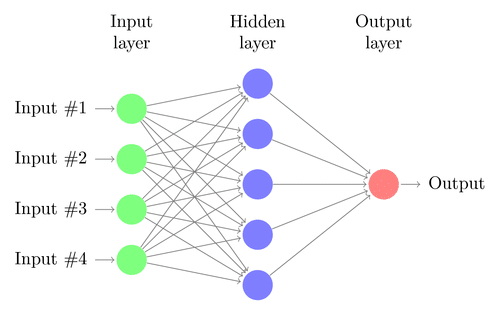

In [20]:
def define_structure(X, Y):
    input_unit = X.shape[0] # size of input layer
    hidden_unit = 4 #hidden layer of size 4 (hardcoded)
    output_unit = Y.shape[0] # size of output layer
    return (input_unit, hidden_unit, output_unit)
(input_unit, hidden_unit, output_unit) = define_structure(X_train, y_train)
print("The size of the input layer is:  = " + str(input_unit))
print("The size of the hidden layer is:  = " + str(hidden_unit))
print("The size of the output layer is:  = " + str(output_unit))

The size of the input layer is:  = 2
The size of the hidden layer is:  = 4
The size of the output layer is:  = 1


W1 and b1 denote the weights and bias for the input layer to the hidden layer respectively.
W2 and b2 denote the weights and bias for the hidden layer to the output layer respectively.
The weights are initialized to random values while the biases are set to 0.

In [21]:
def parameters_initialization(input_unit, hidden_unit, output_unit):
    np.random.seed(2) 
    W1 = np.random.randn(hidden_unit, input_unit)*0.01
    b1 = np.zeros((hidden_unit, 1))
    W2 = np.random.randn(output_unit, hidden_unit)*0.01
    b2 = np.zeros((output_unit, 1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

The tanh() function will be used as the activation function from the input to the hidden layer while the sigmoid() function will be used as the activation function from the hidden layer to the output.

In [22]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2}
    
    return A2, cache

In [23]:
def cross_entropy_cost(A2, Y, parameters):
    # number of training example
    m = Y.shape[1] 
    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1-Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    cost = float(np.squeeze(cost))
                                    
    return cost

In order to minimize the cost function multivariable calculus has been used.

In [24]:
def backward_propagation(parameters, cache, X, Y):
    #number of training example
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
   
    dZ2 = A2-Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T) 
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2,"db2": db2}
    
    return grads

In [25]:
def gradient_descent(parameters, grads, learning_rate = 0.01):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
   
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1, "b1": b1,"W2": W2,"b2": b2}
    
    return parameters

This is the main function where the entire process is brought together.
- The loop will:
    - Implement forward propagation
    - Compute loss
    - Implement backward propagation to get the gradients
    - Update parameters (gradient descent)


In [26]:
def neural_network_model(X, Y, hidden_unit, num_iterations = 1000):
    np.random.seed(3)
    input_unit = define_structure(X, Y)[0]
    output_unit = define_structure(X, Y)[2]
    
    parameters = parameters_initialization(input_unit, hidden_unit, output_unit)
   
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = cross_entropy_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = gradient_descent(parameters, grads)
        if i % 5 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

parameters = neural_network_model(X_train, y_train, 4, num_iterations=1000)

Cost after iteration 0: 0.694014
Cost after iteration 5: 0.690133
Cost after iteration 10: 0.685337
Cost after iteration 15: 0.678369
Cost after iteration 20: 0.668519
Cost after iteration 25: 0.655658
Cost after iteration 30: 0.639998
Cost after iteration 35: 0.621953
Cost after iteration 40: 0.602175
Cost after iteration 45: 0.581463
Cost after iteration 50: 0.560543
Cost after iteration 55: 0.539939
Cost after iteration 60: 0.519966
Cost after iteration 65: 0.500790
Cost after iteration 70: 0.482485
Cost after iteration 75: 0.465065
Cost after iteration 80: 0.448518
Cost after iteration 85: 0.432809
Cost after iteration 90: 0.417900
Cost after iteration 95: 0.403745
Cost after iteration 100: 0.390299
Cost after iteration 105: 0.377519
Cost after iteration 110: 0.365361
Cost after iteration 115: 0.353786
Cost after iteration 120: 0.342757
Cost after iteration 125: 0.332238
Cost after iteration 130: 0.322198
Cost after iteration 135: 0.312606
Cost after iteration 140: 0.303435
Cost af

In [27]:
def prediction(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    
    return predictions

As this was a simple dataset and 1000 iterations were used the result has come out to be accurate.

In [30]:
predictions = prediction(parameters, X_train)
for i in predictions:
  print(i)
for i in y_train:
  print(i)

[1. 0. 0. 1.]
[1 0 0 1]
